# <span style="color:green"> Numerical Simulation Laboratory (NSL) exercises 11 Results</span>

## 11.1

We start by doing a linear regression with a single neuron layer for the function:
$$
f(x)=2x+1
$$

We've done some verification of how the $N_{\mathrm{epochs}}$, the number of data points $N_{\mathrm{train}}$ and inclusion of the noise $\sigma$ affect the results for a neaural network compose by a single neuron.

First we present the result modifing the numbers of points and vary our epochs numbers, $N_{\mathrm{epochs}} = 10,50,200$ and $N_{\mathrm{train}} = 12, 42, 82$ 

Then showing the result with a fixed $N_{\mathrm{epochs}}$ and data points $N_{\mathrm{train}}$ but icreasing $\sigma$ from $0 \to 1$, we show the result for $\sigma = 0.5,1.0$

In [82]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects
from matplotlib import pyplot as plt
import subprocess


import numpy as np

# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 100)
x_valid = np.random.uniform(-1, 1, 10)
x_valid.sort()
y_target = m * x_valid + b

sigma_0 = 0.0
sigma = 0.5
sigma_2 = 1.0 
y_train_0 = np.random.normal(m * x_train + b, sigma_0)
y_valid_0 = np.random.normal(m * x_valid + b, sigma_0)
y_train = np.random.normal(m * x_train + b, sigma)
y_valid = np.random.normal(m * x_valid + b, sigma)
y_train_2 = np.random.normal(m * x_train + b, sigma_2)
y_valid_2 = np.random.normal(m * x_valid + b, sigma_2)

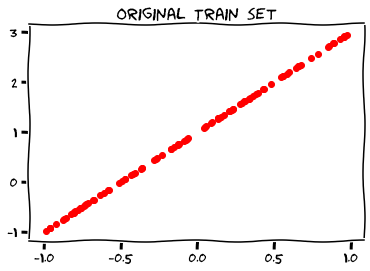

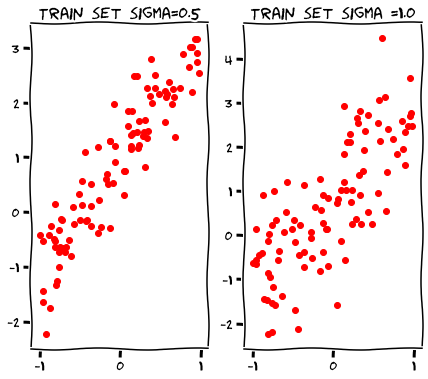

In [83]:
with plt.xkcd():    
    plt.title('Original Train set')
    plt.scatter(x_train, y_train_0, color='r',zorder=10)
    
    plt.subplots(1,2, figsize=(7,6))
    plt.subplot(121)
    plt.title(r'Train set sigma=0.5')
    plt.scatter(x_train, y_train, color='r',zorder=10)
    plt.subplot(122)
    plt.title(r'Train set sigma =1.0')
    plt.scatter(x_train, y_train_2, color='r',zorder=10)
    plt.show()

This are the data set that we're going to use.

Below we show the prediction variation icreasing the $N_{\mathrm{epochs}}$, as can be seen the Train and test loss goes to zero increasing the epochs.

In [95]:
import warnings #Font humor sans create lots of warmings, BUT we have to use it, in the last check up something go wrong so...
warnings.filterwarnings("ignore")


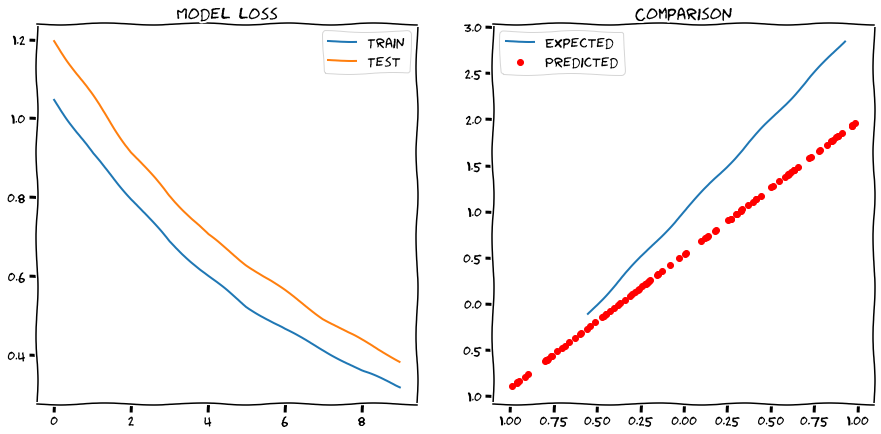

In [94]:
model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))



model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
history = model.fit(x=x_train, y=y_train_0, 
          batch_size=32, epochs=10, verbose= 0,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid_0))
#model.get_weights()

plt.subplots(1,2, figsize=(15,7))
with plt.xkcd():
    plt.subplot(121)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    #plt.ylabel('Loss')
    #plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='best')
     
    plt.subplot(122)
    plt.title('Comparison')
    x_predicted = np.random.uniform(-1, 1, 100)
    y_predicted = model.predict(x_predicted)
    plt.scatter(x_predicted, y_predicted,color='r', zorder=10, label= "Predicted")
    plt.plot(x_valid, y_target, zorder=100 , label= "Expected")
    plt.legend()
    

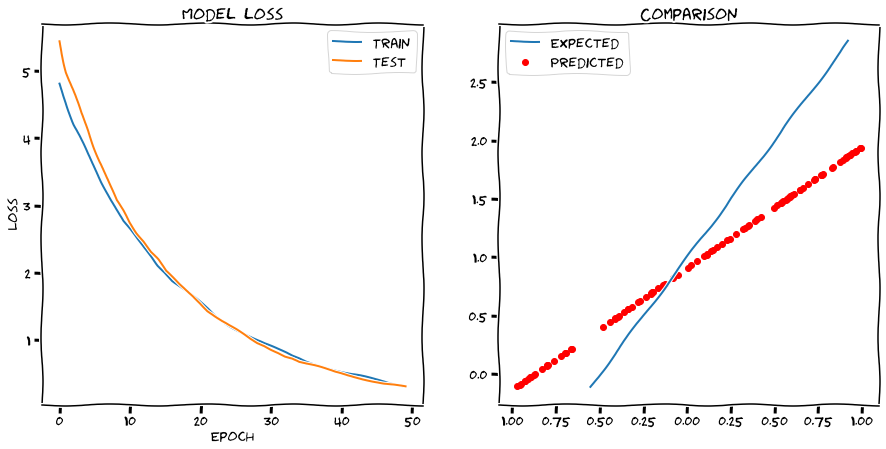

In [96]:
model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))



model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
history = model.fit(x=x_train, y=y_train_0, 
          batch_size=32, epochs=50, verbose= 0,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid_0))
#model.get_weights()

plt.subplots(1,2, figsize=(15,7))
with plt.xkcd():
    plt.subplot(121)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='best')
     
    plt.subplot(122)
    plt.title('Comparison')
    x_predicted = np.random.uniform(-1, 1, 100)
    y_predicted = model.predict(x_predicted)
    plt.scatter(x_predicted, y_predicted,color='r', zorder=10, label= "Predicted")
    plt.plot(x_valid, y_target, zorder=100 , label= "Expected")
    plt.legend()

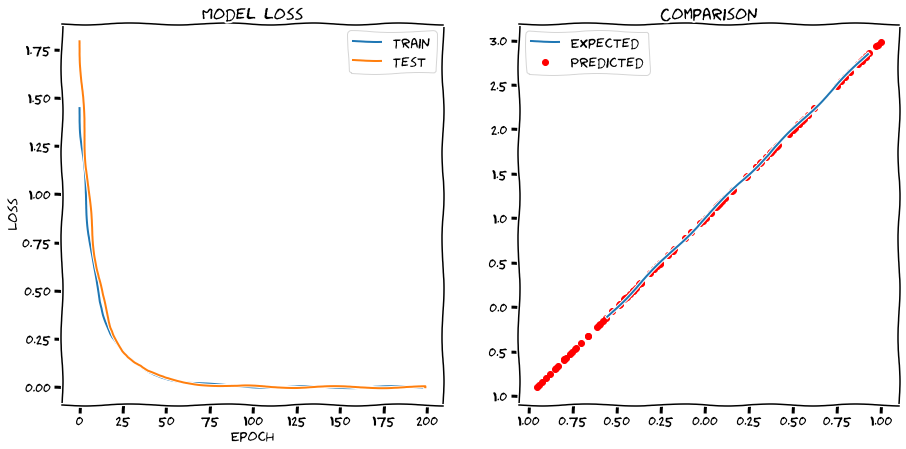

In [97]:
model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))



model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
history = model.fit(x=x_train, y=y_train_0, 
          batch_size=32, epochs=200, verbose= 0,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid_0))
#model.get_weights()

plt.subplots(1,2, figsize=(15,7))
with plt.xkcd():
    plt.subplot(121)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='best')
     
    plt.subplot(122)
    plt.title('Comparison')
    x_predicted = np.random.uniform(-1, 1, 100)
    y_predicted = model.predict(x_predicted)
    plt.scatter(x_predicted, y_predicted,color='r', zorder=10, label= "Predicted")
    plt.plot(x_valid, y_target, zorder=100 , label= "Expected")
    plt.legend()

After 100 epochs our loss function goes to zero and other training time will not improve our result.

We modify now the train points for every epochs, fixing epochs to 100.

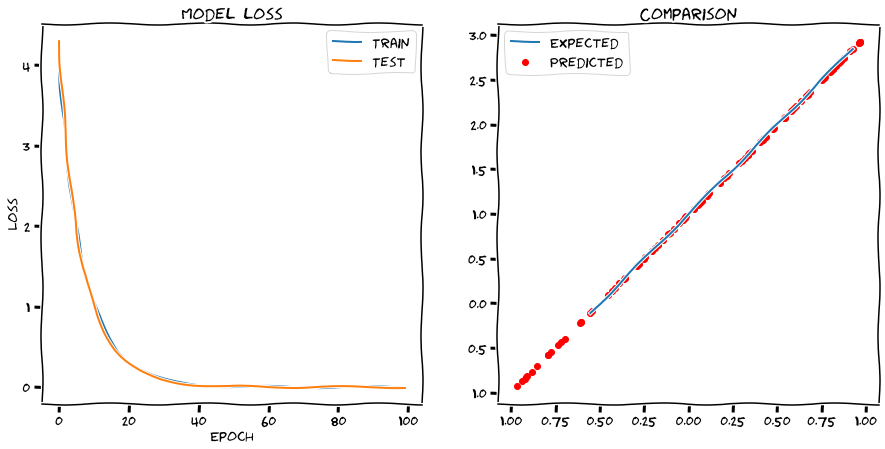

In [98]:
model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))



model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
history = model.fit(x=x_train, y=y_train_0, 
          batch_size=12, epochs=100, verbose= 0,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid_0))
#model.get_weights()

plt.subplots(1,2, figsize=(15,7))
with plt.xkcd():
    plt.subplot(121)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='best')
     
    plt.subplot(122)
    plt.title('Comparison')
    x_predicted = np.random.uniform(-1, 1, 100)
    y_predicted = model.predict(x_predicted)
    plt.scatter(x_predicted, y_predicted,color='r', zorder=10, label= "Predicted")
    plt.plot(x_valid, y_target, zorder=100 , label= "Expected")
    plt.legend()

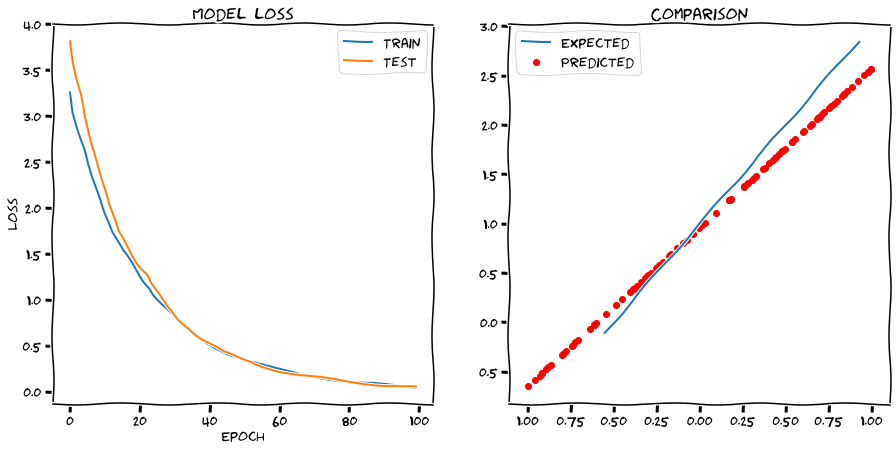

In [99]:
model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))



model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
history = model.fit(x=x_train, y=y_train_0, 
          batch_size=48, epochs=100, verbose= 0,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid_0))
#model.get_weights()

plt.subplots(1,2, figsize=(15,7))
with plt.xkcd():
    plt.subplot(121)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='best')
     
    plt.subplot(122)
    plt.title('Comparison')
    x_predicted = np.random.uniform(-1, 1, 100)
    y_predicted = model.predict(x_predicted)
    plt.scatter(x_predicted, y_predicted,color='r', zorder=10, label= "Predicted")
    plt.plot(x_valid, y_target, zorder=100 , label= "Expected")
    plt.legend()

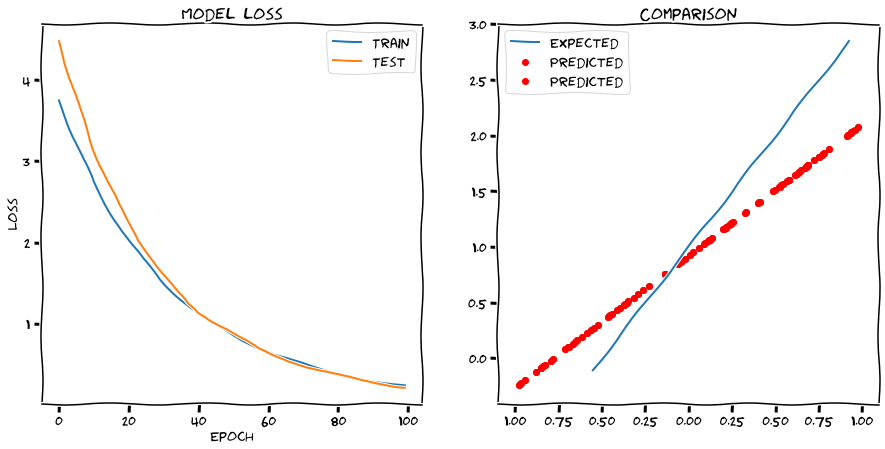

In [101]:
model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))



model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
history = model.fit(x=x_train, y=y_train_0, 
          batch_size=82, epochs=100, verbose= 0,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid_0))
#model.get_weights()

plt.subplots(1,2, figsize=(15,7))
with plt.xkcd():
    plt.subplot(121)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='best')
     
    plt.subplot(122)
    plt.title('Comparison')
    x_predicted = np.random.uniform(-1, 1, 100)
    y_predicted = model.predict(x_predicted)
    plt.scatter(x_predicted, y_predicted,color='r', zorder=10, label= "Predicted")
    plt.scatter(x_predicted, y_predicted,color='r', zorder=10, label= "Predicted")
    plt.plot(x_valid, y_target, zorder=100 , label= "Expected")
    plt.legend()

As can be seen increasing the bach size really hurt our prediction, that is due to all epoch practically use the same data points. 

Now we consider the situation where $\sigma$ differ from 0. 

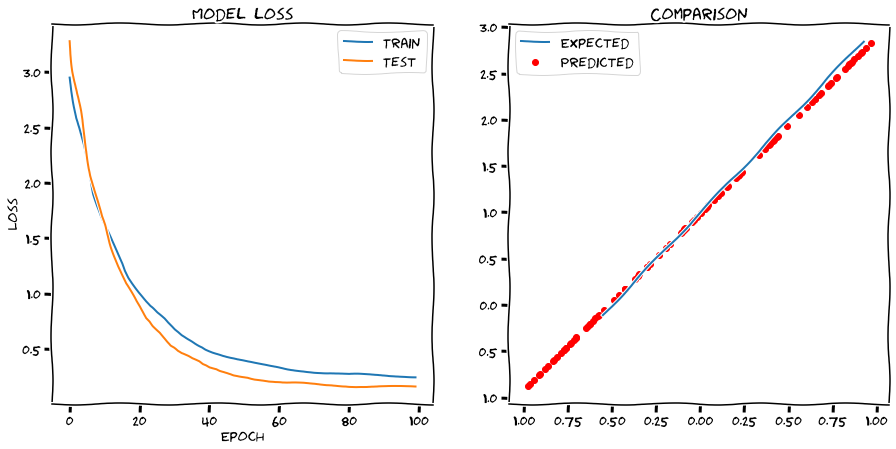

In [102]:
model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))



model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=100, verbose= 0,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))
model.get_weights()

plt.subplots(1,2, figsize=(15,7))
with plt.xkcd():
    plt.subplot(121)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='best')
     
    plt.subplot(122)
    plt.title('Comparison')
    x_predicted = np.random.uniform(-1, 1, 100)
    y_predicted = model.predict(x_predicted)
    plt.scatter(x_predicted, y_predicted,color='r', zorder=10, label= "Predicted")
    plt.plot(x_valid, y_target, zorder=100 , label= "Expected")
    plt.legend()
    

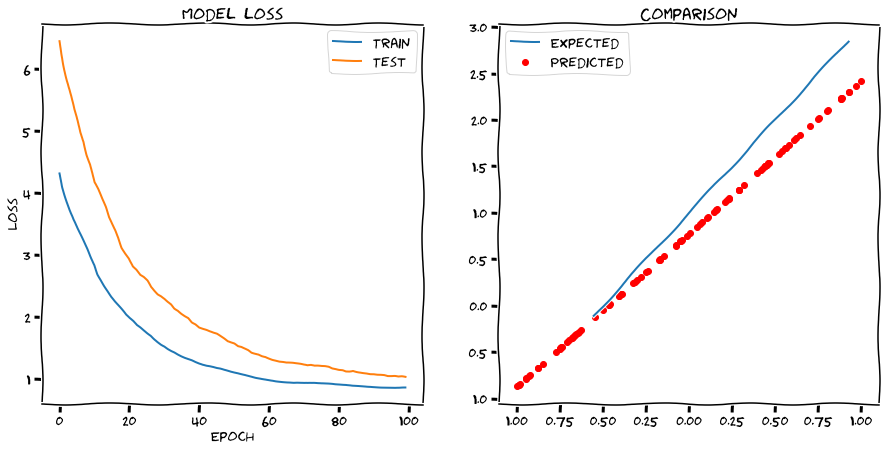

In [103]:
model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))



model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
history = model.fit(x=x_train, y=y_train_2, 
          batch_size=32, epochs=100, verbose= 0,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid_2))
model.get_weights()

plt.subplots(1,2, figsize=(15,7))
with plt.xkcd():
    plt.subplot(121)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='best')
     
    plt.subplot(122)
    plt.title('Comparison')
    x_predicted = np.random.uniform(-1, 1, 100)
    y_predicted = model.predict(x_predicted)
    plt.scatter(x_predicted, y_predicted,color='r', zorder=10, label= "Predicted")
    plt.plot(x_valid, y_target, zorder=100 , label= "Expected")
    plt.legend()
    

Now there was a wider range of possibility to show, like if the variation of the numbers of epochs increase the prediction in the $\sigma$ = 1 situation, or decresing-increase the bach size does the trick and so on.

We've decided to show only the basic results because the original results were a lot and time to implement every situation 
insufficient.

## 11.2

We now consider the following funtion:

$$
f(x)=4-3x-2x^2+3x^3
$$
for $x \in [-1,1]$.

In order to make practice with NN, explore reasonable different choices for:

- the number of layers
- the number of neurons in each layer
- the activation function
- the optimizer
- the loss function
  
Make graphs comparing fits for different NNs.
Check your NN models by seeing how well your fits predict newly generated test data (including on data outside the range you fit. How well do your NN do on points in the range of $x$ where you trained the model? How about points outside the original training data set? 
Summarize what you have learned about the relationship between model complexity (number of parameters), goodness of fit on training data, and the ability to predict well.

Our best extimation utilize a simple NN with just three neurons to identify three or the four parameters plus the intrinsic bias and a standard activation function (default one, we'll show some test with other activation set up below).

Our best result used a "standard gradient descend" method with a great number of data set $N_{\mathrm{train}} = 5000$ and a little batch size of $10$ points with $20$ ephocs.

In [16]:
f = lambda x: 3*x[2]- 2*x[1] -3*x[0] + 4
g = lambda x: 3*x**3- 2*x**2 -3*x*1 + 4

x_train = np.random.uniform(-1, 1, 5000)
x_train = np.array((x_train, x_train**2, x_train**3))
x_valid = np.random.uniform(-1, 1, 10)
x_valid = np.array((x_valid, x_valid**2, x_valid**3))
x_valid.sort()

y_target = f(x_valid)

sigma = 0.0 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(f(x_train), sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(f(x_valid), sigma)

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(3,), use_bias=True))
model.summary()

model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
history = model.fit(x=x_train.T, y=y_train, 
          batch_size=10, epochs=20,verbose = 0,
          #shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid.T, y_valid))
model.get_weights()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


[array([[-2.9326491],
        [-1.9991624],
        [ 2.893696 ]], dtype=float32), array([3.9991553], dtype=float32)]

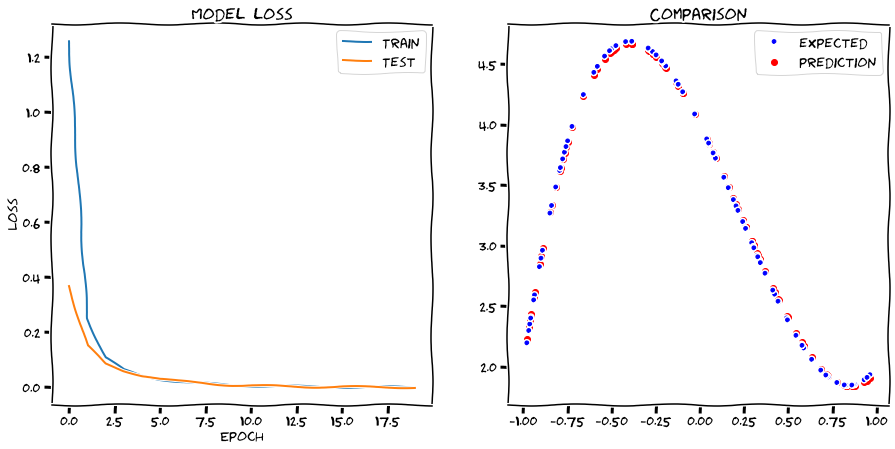

In [17]:
plt.subplots(1,2, figsize=(15,7))
with plt.xkcd():
    plt.subplot(121)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='best')
x_predicted = np.random.uniform(-1, 1, 100)
x_predicted = np.array((x_predicted, x_predicted**2,x_predicted**3))
y_predicted = model.predict(x_predicted.T)
y_true = f(x_predicted)
with plt.xkcd():
    plt.subplot(122)
    plt.title('Comparison')
    plt.scatter(x_predicted[0], y_predicted,color='r', label='prediction')
    plt.plot(x_predicted[0], g(x_predicted[0]), 'b.', label='expected')
    plt.legend()
    plt.show()


We've tried different approach with the optimizer on this set up, for example the Nadam method require a lower batch size ($8$) with the same other parameters to get the same result but with a greater loss as can be see by the loss function depicetd below. 

In [104]:
f = lambda x: 3*x[2]- 2*x[1] -3*x[0] + 4
g = lambda x: 3*x**3- 2*x**2 -3*x*1 + 4

x_train = np.random.uniform(-1, 1, 5000)
x_train = np.array((x_train, x_train**2, x_train**3))
x_valid = np.random.uniform(-1, 1, 10)
x_valid = np.array((x_valid, x_valid**2, x_valid**3))
x_valid.sort()

y_target = f(x_valid)

sigma = 0.0 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(f(x_train), sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(f(x_valid), sigma)

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(3,), use_bias=True))
model.summary()

model.compile(optimizer='Nadam', loss='mse', metrics=['mse'])
history = model.fit(x=x_train.T, y=y_train, 
          batch_size=8, epochs=20,verbose = 0,
          #shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid.T, y_valid))
model.get_weights()

Model: "sequential_46"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_61 (Dense)             (None, 1)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


[array([[-2.9296546],
        [-2.0030422],
        [ 2.891762 ]], dtype=float32), array([4.000006], dtype=float32)]

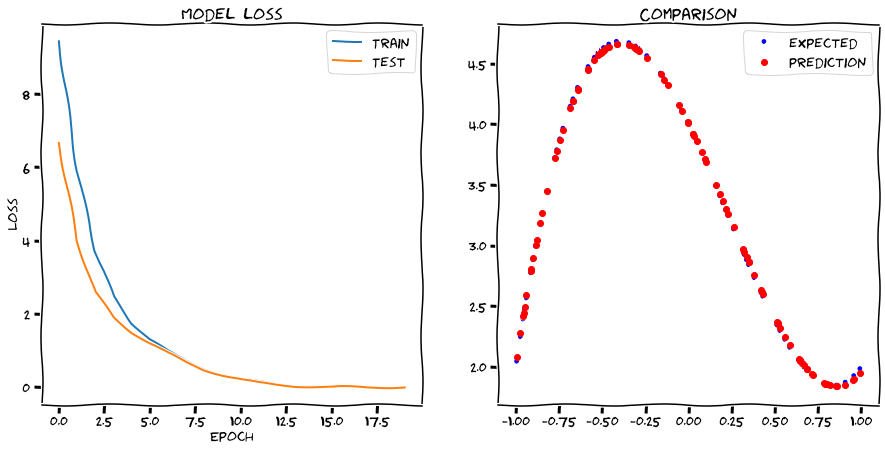

In [105]:
plt.subplots(1,2, figsize=(15,7))
with plt.xkcd():
    plt.subplot(121)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='best')
x_predicted = np.random.uniform(-1, 1, 100)
x_predicted = np.array((x_predicted, x_predicted**2,x_predicted**3))
y_predicted = model.predict(x_predicted.T)
y_true = f(x_predicted)
with plt.xkcd():
    plt.subplot(122)
    plt.title('Comparison')
    plt.scatter(x_predicted[0], y_predicted,color='r', label='prediction', zorder=10)
    plt.plot(x_predicted[0], g(x_predicted[0]), 'b.', label='expected')
    plt.legend()
    plt.show()


Below another example with the RMsprop method, the situation is the same with the initial bach size ($10$) with still a worse result than the initial one.

In [106]:
f = lambda x: 3*x[2]- 2*x[1] -3*x[0] + 4
g = lambda x: 3*x**3- 2*x**2 -3*x*1 + 4

x_train = np.random.uniform(-1, 1, 5000)
x_train = np.array((x_train, x_train**2, x_train**3))
x_valid = np.random.uniform(-1, 1, 10)
x_valid = np.array((x_valid, x_valid**2, x_valid**3))
x_valid.sort()

y_target = f(x_valid)

sigma = 0.0 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(f(x_train), sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(f(x_valid), sigma)

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(3,), use_bias=True))
model.summary()

model.compile(optimizer='RMsprop', loss='mse', metrics=['mse'])
history = model.fit(x=x_train.T, y=y_train, 
          batch_size=10, epochs=20,verbose = 0,
          #shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid.T, y_valid))
model.get_weights()

Model: "sequential_47"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_62 (Dense)             (None, 1)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


[array([[-3.0001304],
        [-2.0000744],
        [ 2.9997926]], dtype=float32), array([3.9999166], dtype=float32)]

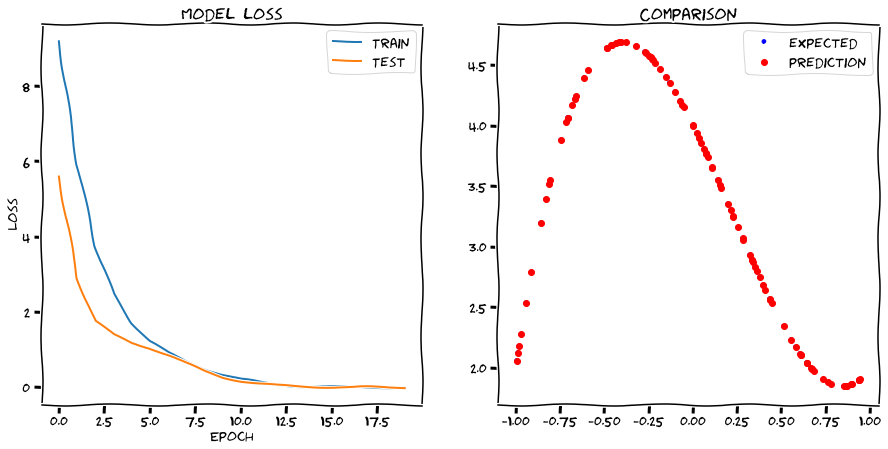

In [107]:
plt.subplots(1,2, figsize=(15,7))
with plt.xkcd():
    plt.subplot(121)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='best')
x_predicted = np.random.uniform(-1, 1, 100)
x_predicted = np.array((x_predicted, x_predicted**2,x_predicted**3))
y_predicted = model.predict(x_predicted.T)
y_true = f(x_predicted)
with plt.xkcd():
    plt.subplot(122)
    plt.title('Comparison')
    plt.scatter(x_predicted[0], y_predicted,color='r', label='prediction', zorder=10)
    plt.plot(x_predicted[0], g(x_predicted[0]), 'b.', label='expected')
    plt.legend()
    plt.show()


We've done test with other optimizers but the sgd remain our best one with the above set up.

We've done some test with the introduction of a different activation function but with no good results, using the best set up we tried the sigmoid activation function.

This result was expected as every neuron should identify only one constant parameter and the introduction of a sigmoid activation function will surely not help.

In [25]:
f = lambda x: 3*x[2]- 2*x[1] -3*x[0] + 4
g = lambda x: 3*x**3- 2*x**2 -3*x*1 + 4

x_train = np.random.uniform(-1, 1, 5000)
x_train = np.array((x_train, x_train**2, x_train**3))
x_valid = np.random.uniform(-1, 1, 10)
x_valid = np.array((x_valid, x_valid**2, x_valid**3))
x_valid.sort()

y_target = f(x_valid)

sigma = 0.0 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(f(x_train), sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(f(x_valid), sigma)

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(3,),activation='sigmoid', use_bias=True))
model.summary()

model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
history = model.fit(x=x_train.T, y=y_train, 
          batch_size=10, epochs=20,verbose = 0,
          #shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid.T, y_valid))
model.get_weights()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 1)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


[array([[-0.7393996 ],
        [ 1.1111078 ],
        [ 0.47060937]], dtype=float32), array([5.86347], dtype=float32)]

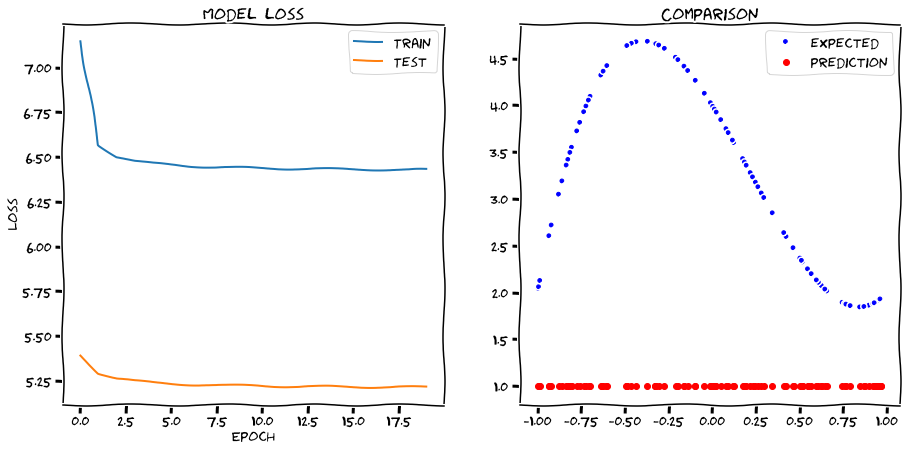

In [27]:
plt.subplots(1,2, figsize=(15,7))
with plt.xkcd():
    plt.subplot(121)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='best')
x_predicted = np.random.uniform(-1, 1, 100)
x_predicted = np.array((x_predicted, x_predicted**2,x_predicted**3))
y_predicted = model.predict(x_predicted.T)
y_true = f(x_predicted)
with plt.xkcd():
    plt.subplot(122)
    plt.title('Comparison')
    plt.scatter(x_predicted[0], y_predicted,color='r', label='prediction', zorder=10)
    plt.plot(x_predicted[0], g(x_predicted[0]), 'b.', label='expected')
    plt.legend()
    plt.show()


Other activation function without changing our layer set up will not improve the results.

If we increase the validation area outside the original boundaries with our best set up the model turn out to be capable of evaluate the function outside the area, in this case we have increase the test range from $x \in [-1,1]$ to $x \in [-2,2]$:

In [108]:
f = lambda x: 3*x[2]- 2*x[1] -3*x[0] + 4
g = lambda x: 3*x**3- 2*x**2 -3*x*1 + 4

x_train = np.random.uniform(-1, 1, 5000)
x_train = np.array((x_train, x_train**2, x_train**3))
x_valid = np.random.uniform(-2, 2, 10)
x_valid = np.array((x_valid, x_valid**2, x_valid**3))
x_valid.sort()

y_target = f(x_valid)

sigma = 0.0 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(f(x_train), sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(f(x_valid), sigma)

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(3,), use_bias=True))
model.summary()

model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
history = model.fit(x=x_train.T, y=y_train, 
          batch_size=10, epochs=20,verbose = 0,
          #shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid.T, y_valid))
model.get_weights()

Model: "sequential_48"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_63 (Dense)             (None, 1)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


[array([[-2.9282193],
        [-2.000952 ],
        [ 2.8856802]], dtype=float32), array([3.999156], dtype=float32)]

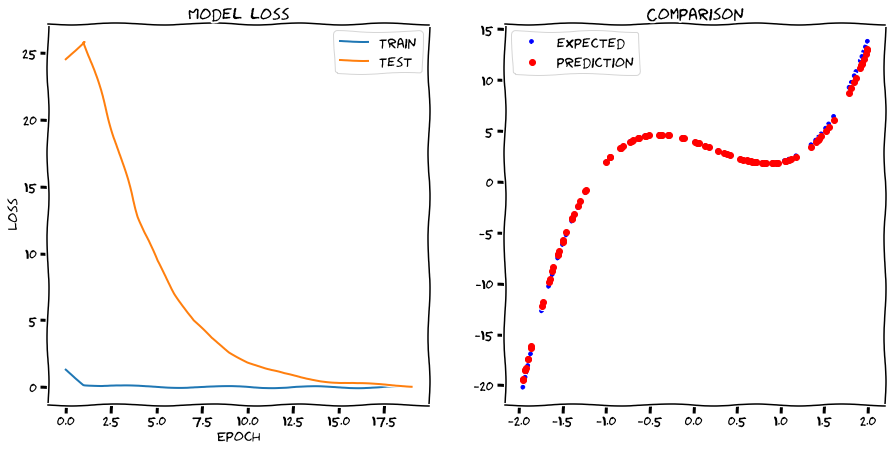

In [109]:
plt.subplots(1,2, figsize=(15,7))
with plt.xkcd():
    plt.subplot(121)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='best')
x_predicted = np.random.uniform(-2, 2, 100)
x_predicted = np.array((x_predicted, x_predicted**2,x_predicted**3))
y_predicted = model.predict(x_predicted.T)
y_true = f(x_predicted)
with plt.xkcd():
    plt.subplot(122)
    plt.title('Comparison')
    plt.scatter(x_predicted[0], y_predicted,color='r', label='prediction', zorder=10)
    plt.plot(x_predicted[0], g(x_predicted[0]), 'b.', label='expected')
    plt.legend()
    plt.show()

If we further increase the test range for example $x \in [-8,8]$, then we get:


In [110]:
f = lambda x: 3*x[2]- 2*x[1] -3*x[0] + 4
g = lambda x: 3*x**3- 2*x**2 -3*x*1 + 4

x_train = np.random.uniform(-1, 1, 5000)
x_train = np.array((x_train, x_train**2, x_train**3))
x_valid = np.random.uniform(-8, 8, 10)
x_valid = np.array((x_valid, x_valid**2, x_valid**3))
x_valid.sort()

y_target = f(x_valid)

sigma = 0.0 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(f(x_train), sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(f(x_valid), sigma)

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(3,), use_bias=True))
model.summary()

model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
history = model.fit(x=x_train.T, y=y_train, 
          batch_size=10, epochs=20,verbose = 0,
          #shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid.T, y_valid))
model.get_weights()

Model: "sequential_49"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_64 (Dense)             (None, 1)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


[array([[-2.8847718],
        [-1.9970104],
        [ 2.8181183]], dtype=float32), array([3.9991796], dtype=float32)]

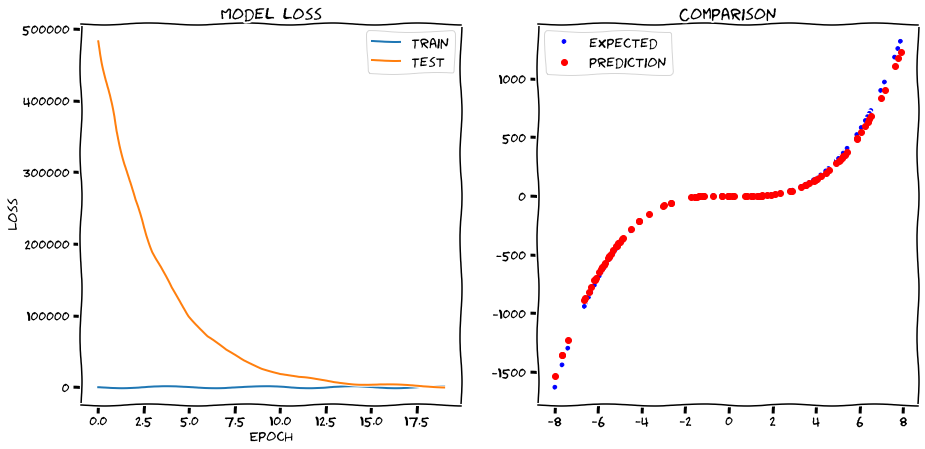

In [111]:
plt.subplots(1,2, figsize=(15,7))
with plt.xkcd():
    plt.subplot(121)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='best')
x_predicted = np.random.uniform(-8, 8, 100)
x_predicted = np.array((x_predicted, x_predicted**2,x_predicted**3))
y_predicted = model.predict(x_predicted.T)
y_true = f(x_predicted)
with plt.xkcd():
    plt.subplot(122)
    plt.title('Comparison')
    plt.scatter(x_predicted[0], y_predicted,color='r', label='prediction', zorder=10)
    plt.plot(x_predicted[0], g(x_predicted[0]), 'b.', label='expected')
    plt.legend()
    plt.show()

The Test function loss became initially very large, but after less then 20 epoch our NN is still able to evaluate the function outside the initial test area.

We have not go further with the interval size so we does not not if there is a point where our NN became incapable to make a good prediction.

This is our best result obtained after a lot of different model and attempts, we'll show one below, instead of three neurons we use two layers, one of three neurons the other with one both without bias to get the four parameters. (This was the initial idea) 

In [112]:
f = lambda x: 3*x[2]- 2*x[1] -3*x[0] + 4
g = lambda x: 3*x**3- 2*x**2 -3*x*1 + 4

x_train = np.random.uniform(-1, 1, 50)
x_train = np.array((x_train, x_train**2, x_train**3))
x_valid = np.random.uniform(-1, 1, 10)
x_valid = np.array((x_valid, x_valid**2, x_valid**3))
x_valid.sort()

y_target = f(x_valid)

sigma = 0.0 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(f(x_train), sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(f(x_valid), sigma)

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(3,), use_bias=False))
model.add(Dense(1, input_shape=(1,),activation="relu", use_bias=False))
model.summary()

model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
history = model.fit(x=x_train.T, y=y_train, 
          batch_size=10, epochs=100,verbose = 0,
          #shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid.T, y_valid))
model.get_weights()

Model: "sequential_50"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_65 (Dense)             (None, 1)                 3         
_________________________________________________________________
dense_66 (Dense)             (None, 1)                 1         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


[array([[ 1.9197017],
        [-1.1985407],
        [-2.1521258]], dtype=float32), array([[-3.300234]], dtype=float32)]

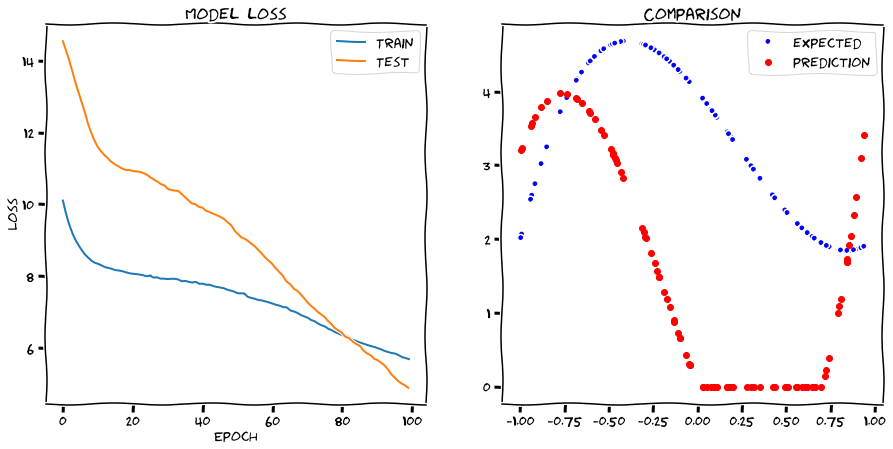

In [113]:
plt.subplots(1,2, figsize=(15,7))
with plt.xkcd():
    plt.subplot(121)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='best')
x_predicted = np.random.uniform(-1, 1, 100)
x_predicted = np.array((x_predicted, x_predicted**2,x_predicted**3))
y_predicted = model.predict(x_predicted.T)
y_true = f(x_predicted)
with plt.xkcd():
    plt.subplot(122)
    plt.title('Comparison')
    plt.scatter(x_predicted[0], y_predicted,color='r', label='prediction', zorder=10)
    plt.plot(x_predicted[0], g(x_predicted[0]), 'b.', label='expected')
    plt.legend()
    plt.show()

As can be seen our model is incapable of obtain a useful result with sgd, train data set $N_{\mathrm{train}} = 50$ and a little batch size of $10$ points with $100$ ephocs and an activation "relu" for the second layer with one neuron.

We do not expect a good result with this set up, as said an activation method should help with not constant parameters and a batch size comparable with the training data set dimension decrese the model predictivity. 

Increasing the epochs numbers does not help either because our model use every time the same data.

## 11.3
  
We then construct a NN to extrapolate $f(x,y) = \sin(x^2+y^2)$ in the range $x \in [-3/2,3/2]$ and $y \in [-3/2,3/2]$.

To do so we use a NN composed by two layers, the first with $20$ neurons with activation function "relu", the other with one, both with bias included.

Our training points are $5000$ with a batch size of $100$ a validation sample of $1000$, $150$ epochs and "adam" method as optimizer.

In [58]:
f = lambda x: np.sin(x[0]**2+x[1]**2)

x_train = np.random.rand(2,5000)*3-3/2
x_valid = np.random.rand(2,1000)*3-3/2

y_target = f(x_valid)

sigma = 0.1 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(f(x_train), sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(f(x_valid), sigma)

model = tf.keras.Sequential()
model.add(Dense(20, input_shape=(2,), activation='relu'))
model.add(Dense(1))
model.summary()

model.compile(optimizer='adam', loss='mse', metrics=['mse'])
history = model.fit(x=x_train.T, y=y_train, 
          batch_size=100, epochs=150,verbose = 0,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid.T, y_valid))
# model.get_weights()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 20)                60        
_________________________________________________________________
dense_42 (Dense)             (None, 1)                 21        
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


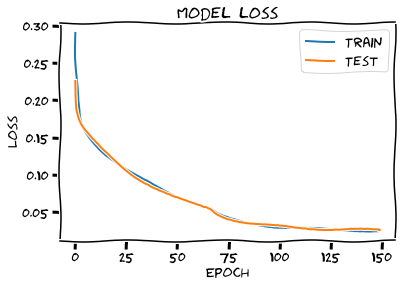

In [59]:
with plt.xkcd():
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='best')
    plt.show()


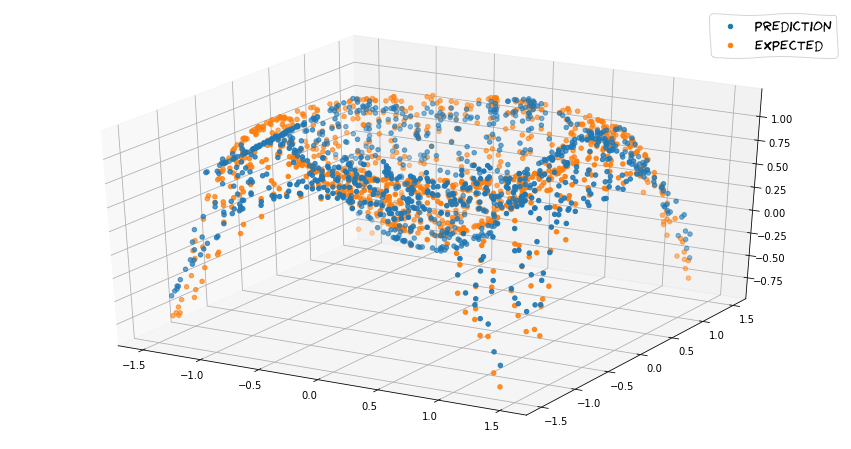

In [76]:
x_predicted = np.random.rand(2,1000)*3-3/2
y_predicted = model.predict(x_predicted.T)
y_true = f(x_predicted)
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111, projection='3d')

with plt.xkcd():#This does not work uff...
    ax.scatter(xs=x_predicted[0,:], ys=x_predicted[1,:], zs=y_predicted, label = "prediction")
    ax.scatter(xs=x_predicted[0,:], ys=x_predicted[1,:], zs=y_true, label = "expected")
    ax.legend()
#     plt.scatter(x_predicted[0], y_predicted,color='r')
#     plt.plot(x_predicted[0], y_true, 'b.')
#     plt.grid(True)
plt.show()


Our results are capable to predict the function quite well as can be seen by the above plot.